In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path=os.getcwd()
#path

os.chdir(path+'/underground/')

g_shp=nx.read_shp('underground.shp',geom_attrs=False)

# We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(g_shp)
df.head(3)

# add station name to node
nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}

nod_all = nod_st1.copy()
nod_all.update(nod_st2)

nx.set_node_attributes(g_shp,nod_all,'station')

# convert to undirected
g_shp_un = g_shp.to_undirected()
# ID assignment
nod_coord = {(e1):e1 for e1 in g_shp_un.nodes()}
nx.set_node_attributes(g_shp_un,nod_coord,'station_coord')
#list(g_shp_un.nodes(data=True))[0:2]

node_list = list(g_shp_un.nodes())
mapping = {node_list[i]:i for i in range(len(node_list))}
g_shp_un = nx.relabel_nodes(g_shp_un, mapping)
#list(g_shp_un.nodes(data=True))[0:10]

nodes = [(x,y) for x,y in g_shp_un.nodes(data='station') if 'Heathrow' in str(y)]
#nodes

g_shp_un.nodes[258]['station']='Heathrow Terminals 123'

#g_shp_un.nodes[258]['station']

## betweeness

In [3]:
g_shp_un_unsequential=g_shp_un.copy()

G=g_shp_un_unsequential

bet_london_w=nx.betweenness_centrality(G, weight='distance', normalized=False)

nx.set_node_attributes(G,bet_london_w,'betweenness_un')

from collections import OrderedDict

i=0
efficiency=[]

while i<31:
    dict_bet_un=dict(G.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True))
    #print(list(listbet_un.items())[0])
    #G.remove_node(list(listbet_un.items())[0][0])
    N=len(G.nodes)
    dij=[]
    for o,d,w in G.edges(data='distance'):
        shortest_distance = nx.dijkstra_path_length(G,o,d,weight='distance')  
        #inver_distance=1/shortest_distance
        dij.append(1/shortest_distance)   
        eff=sum(dij)*(1/N*(N-1))
    efficiency.append(eff)
    G.remove_node(list(listbet_un.items())[0][0])
    i+=1

#list(listbet_un.items())[:3]
#len(list(g_shp_un_unsequential.nodes(data=True)))
#len(efficiency)

effi_bet = pd.DataFrame(efficiency,columns=['efficiency'])
r = effi_bet.efficiency[0]
effi_bet['decline_ratio']=(r-effi_bet.efficiency)/r

#Connectivity_coeff['conn_coeff'] = np.array(conn_coeff)
#effi.dropna(subset=['efficiency'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(effi.index,effi.efficiency)
#plt.title('Impact of non-sequential node removal with efficiency')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('Efficiency')
#plt.show()

In [4]:
g_shp_un_sequential=g_shp_un.copy()

G=g_shp_un_sequential

from collections import OrderedDict

i=0

#dij=[]
efficiency=[]

while i<30:
    bet_london_w=nx.betweenness_centrality(G, weight='distance', normalized=False)
    nx.set_node_attributes(G,bet_london_w,'betweenness_un')
    dict_bet_un=dict(G.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True))
    #print(list(listbet_un.items())[0])
    G.remove_node(list(listbet_un.items())[0][0])
    N=len(G.nodes)
    dij=[]
    for o,d,w in G.edges(data='distance'):
        shortest_distance = nx.dijkstra_path_length(G,o,d,weight='distance')  
        #inver_distance=1/shortest_distance
        dij.append(1/shortest_distance)   
        eff=sum(dij)*(1/N*(N-1))
    efficiency.append(eff)
    i+=1

#list(listbet_un.items())[:3]
#len(list(g_shp_un_sequential.nodes(data=True)))
#len(efficiency)

effi_betse = pd.DataFrame(efficiency,columns=['efficiency'])
    
#Connectivity_coeff['conn_coeff'] = np.array(conn_coeff)
#effi.dropna(subset=['efficiency'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(effi.index,effi.efficiency)
#plt.title('Impact of sequential node removal with efficiency')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('Efficiency')
#plt.show()

## closeness

In [5]:
g_shp_un_unsequential=g_shp_un.copy()

#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(g_shp_un_unsequential, distance='distance')
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un_unsequential,clos_w,'closeness_w')


from collections import OrderedDict

i=0
G=g_shp_un_unsequential
#dij=[]
efficiency=[]

while i<30:
    dict_bet_un=dict(G.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['closeness_w'],reverse=True))
    #print(list(listbet_un.items())[0])
    G.remove_node(list(listbet_un.items())[0][0])
    N=len(G.nodes)
    dij=[]
    for o,d,w in G.edges(data='distance'):
        shortest_distance = nx.dijkstra_path_length(G,o,d,weight='distance')  
        #inver_distance=1/shortest_distance
        dij.append(1/shortest_distance)   
        eff=sum(dij)*(1/N*(N-1))
    efficiency.append(eff)
    i+=1

#list(listbet_un.items())[:3]
#len(list(g_shp_un_unsequential.nodes(data=True)))
#len(efficiency)

effi_clo = pd.DataFrame(efficiency,columns=['efficiency'])
    
#Connectivity_coeff['conn_coeff'] = np.array(conn_coeff)
#effi.dropna(subset=['efficiency'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(effi.index,effi.efficiency)
#plt.title('Impact of non-sequential node removal with efficiency')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('Efficiency')
#plt.show()

In [6]:
g_shp_un_sequential=g_shp_un.copy()

G=g_shp_un_sequential

from collections import OrderedDict

i=0

#dij=[]
efficiency=[]

while i<30:
    clos_w=nx.closeness_centrality(g_shp_un_sequential, distance='distance')
    nx.set_node_attributes(g_shp_un_sequential,clos_w,'closeness_w')
    dict_bet_un=dict(G.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['closeness_w'],reverse=True))
    #print(list(listbet_un.items())[0])
    G.remove_node(list(listbet_un.items())[0][0])
    N=len(G.nodes)
    dij=[]
    for o,d,w in G.edges(data='distance'):
        shortest_distance = nx.dijkstra_path_length(G,o,d,weight='distance')  
        #inver_distance=1/shortest_distance
        dij.append(1/shortest_distance)   
        eff=sum(dij)*(1/N*(N-1))
    efficiency.append(eff)
    i+=1

#list(listbet_un.items())[:3]
#len(list(g_shp_un_sequential.nodes(data=True)))
#len(efficiency)

effi_clse = pd.DataFrame(efficiency,columns=['efficiency'])
    
#Connectivity_coeff['conn_coeff'] = np.array(conn_coeff)
#effi.dropna(subset=['efficiency'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(effi.index,effi.efficiency)
#plt.title('Impact of sequential node removal with efficiency')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('Efficiency')
#plt.show()

## degree

In [7]:
g_shp_un_unsequential=g_shp_un.copy()

degree_london_w=nx.degree(g_shp_un_unsequential)

nx.set_node_attributes(g_shp_un_unsequential,dict(degree_london_w),'degree_un')

from collections import OrderedDict

i=0
G=g_shp_un_unsequential
efficiency=[]

while i<30:
    dict_bet_un=dict(G.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['degree_un'],reverse=True))
    #print(list(listbet_un.items())[0])
    G.remove_node(list(listbet_un.items())[0][0])
    N=len(G.nodes)
    dij=[]
    for o,d,w in G.edges(data='distance'):
        shortest_distance = nx.dijkstra_path_length(G,o,d,weight='distance')  
        #inver_distance=1/shortest_distance
        dij.append(1/shortest_distance)   
        eff=sum(dij)*(1/N*(N-1))
    efficiency.append(eff)
    i+=1

#list(listbet_un.items())[:3]
#len(list(g_shp_un_unsequential.nodes(data=True)))
#len(efficiency)

effi_deg = pd.DataFrame(efficiency,columns=['efficiency'])
    
#Connectivity_coeff['conn_coeff'] = np.array(conn_coeff)
#effi.dropna(subset=['efficiency'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(effi.index,effi.efficiency)
#plt.title('Impact of non-sequential node removal with efficiency')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('Efficiency')
#plt.show()

In [8]:
g_shp_un_sequential=g_shp_un.copy()

G=g_shp_un_sequential

from collections import OrderedDict

i=0

#dij=[]
efficiency=[]

while i<30:
    degree_london_w=nx.degree(g_shp_un_sequential)
    nx.set_node_attributes(g_shp_un_sequential,dict(degree_london_w),'degree_un')
    dict_bet_un=dict(G.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['degree_un'],reverse=True))
    #print(list(listbet_un.items())[0])
    G.remove_node(list(listbet_un.items())[0][0])
    N=len(G.nodes)
    dij=[]
    for o,d,w in G.edges(data='distance'):
        shortest_distance = nx.dijkstra_path_length(G,o,d,weight='distance')  
        #inver_distance=1/shortest_distance
        dij.append(1/shortest_distance)   
        eff=sum(dij)*(1/N*(N-1))
    efficiency.append(eff)
    i+=1

#list(listbet_un.items())[:3]
#len(list(g_shp_un_sequential.nodes(data=True)))
#len(efficiency)

effi_degse = pd.DataFrame(efficiency,columns=['efficiency'])
    
#Connectivity_coeff['conn_coeff'] = np.array(conn_coeff)
#effi.dropna(subset=['efficiency'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(effi.index,effi.efficiency)
#plt.title('Impact of sequential node removal with efficiency')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('Efficiency')
#plt.show()

## plot all

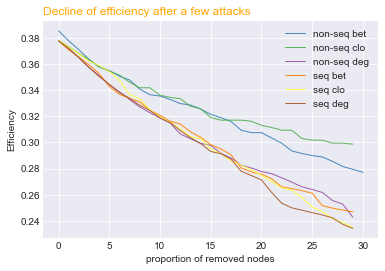

In [9]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
n=len(g_shp_un.nodes)    
# Make a data frame
df=pd.DataFrame({'x' : effi_bet.index, 
                 'non-seq bet': effi_bet.efficiency,
                 'non-seq clo': effi_clo.efficiency,
                 'non-seq deg': effi_deg.efficiency,
                 'seq bet': effi_betse.efficiency,
                 'seq clo': effi_clse.efficiency, 
                 'seq deg': effi_degse.efficiency})
 
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=1, ncol=1)
 
# Add titles
plt.title("Decline of efficiency after a few attacks", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("proportion of removed nodes")
plt.ylabel("Efficiency")

# Show the graph
plt.show()